<a href="https://colab.research.google.com/github/KushiBK/KushiBK/blob/main/FlipKart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Case Study 1: Data Cleaning & Standardization

In [2]:
df = pd.read_csv('/content/flipkart_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [3]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [4]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']

,Order Date
0,2024-09-12
1,2024-12-18
2,2024-05-18
3,2024-11-08
4,2024-12-27
...,...
995,2025-01-13
996,2024-12-18
997,2024-07-26
998,2024-10-02


In [5]:
# Standardize Payment Method
df['Payment Method'] = df['Payment Method'].str.title()
df['Payment Method']

,Payment Method
0,Debit Card
1,Upi
2,Debit Card
3,Debit Card
4,Upi
...,...
995,Cod
996,Wallet
997,Upi
998,Net Banking


In [6]:
# Verify data types
print(df.dtypes)

Order ID                     object
Product Name                 object
Category                     object
Price (INR)                 float64
Quantity Sold                 int64
Total Sales (INR)           float64
Order Date           datetime64[ns]
Payment Method               object
Customer Rating             float64
dtype: object


Case Study 2: Handling Missing Values

In [7]:
print(df.isnull().sum())

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
dtype: int64


In [8]:
#For demonstration, impute missing Customer Rating with median

df['Customer Rating'].fillna(df['Customer Rating'].median(), inplace=True)
df['Customer Rating']

/tmp/ipython-input-1874121524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Rating'].fillna(df['Customer Rating'].median(), inplace=True)


,Customer Rating
0,3.5
1,3.9
2,4.4
3,3.2
4,3.1
...,...
995,5.0
996,2.4
997,3.1
998,3.2


Case Study 3: Descriptive Statistics & Summary

In [9]:
print(df[['Price (INR)','Quantity Sold','Total Sales (INR)','Customer Rating']].describe())

        Price (INR)  Quantity Sold  Total Sales (INR)  Customer Rating
count   1000.000000    1000.000000        1000.000000      1000.000000
mean   24520.258260       3.097000       75213.112740         3.011100
std    14187.611227       1.410525       59457.598352         1.145408
min      139.850000       1.000000         419.550000         1.000000
25%    12378.905000       2.000000       28581.765000         2.000000
50%    24650.015000       3.000000       57358.300000         3.100000
75%    35981.925000       4.000000      110618.595000         4.000000
max    49911.750000       5.000000      243903.900000         5.000000


Case Study 4: Sales Trend Analysis

/tmp/ipython-input-1136790840.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Sales (INR)'].resample('M').sum()


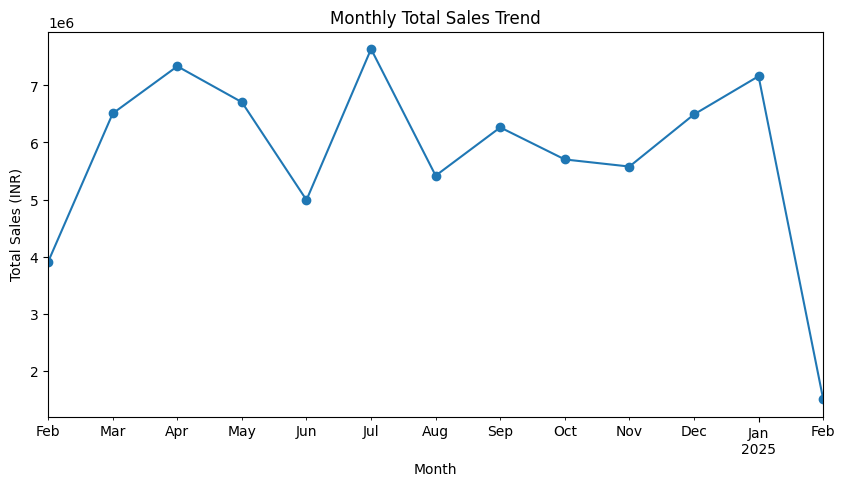

In [10]:
df.set_index('Order Date', inplace=True)
monthly_sales = df['Total Sales (INR)'].resample('M').sum()
monthly_sales.plot(figsize=(10,5), marker='o')
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.show()

Case Study 5: Category-wise Sales Analysis

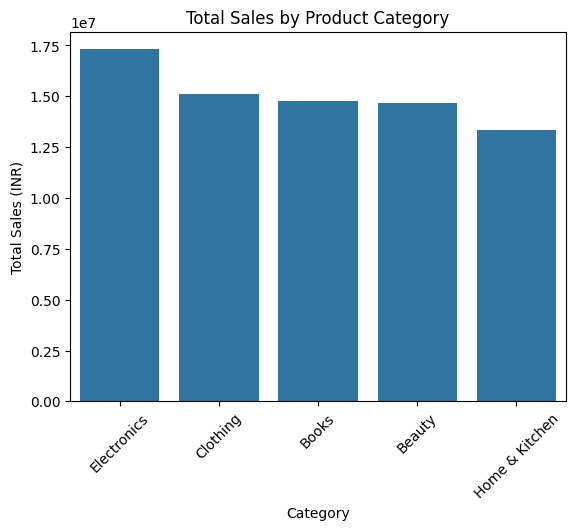

In [11]:
category_sales = df.groupby('Category')['Total Sales (INR)'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (INR)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

Case Study 6: Payment Method Analysis

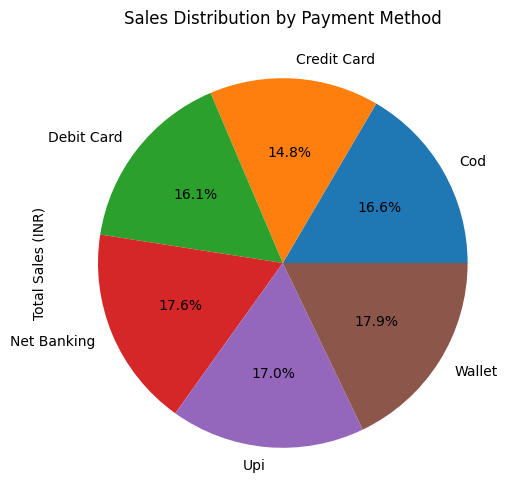

In [12]:
payment_sales = df.groupby('Payment Method')['Total Sales (INR)'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Distribution by Payment Method")
plt.show()

Case Study 7: Price vs Quantity Sold Analysis

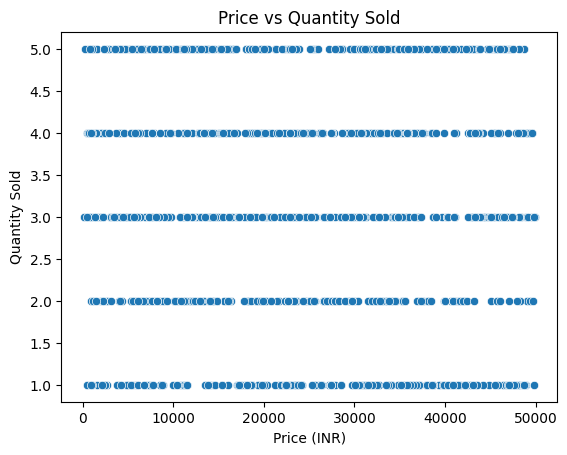

In [13]:
sns.scatterplot(x='Price (INR)', y='Quantity Sold', data=df)
plt.title("Price vs Quantity Sold")
plt.show()

Case Study 8: Customer Rating Analysis

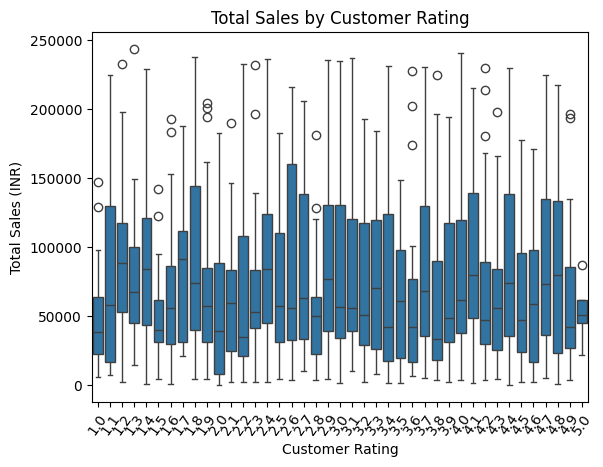

In [18]:
sns.boxplot(x='Customer Rating', y='Total Sales (INR)', data=df)
plt.xticks(rotation=55)
plt.title("Total Sales by Customer Rating")
plt.show()

Case Study 9: Actionable Insights & Recommendations

In [20]:
top_products = df.groupby('Product Name')['Total Sales (INR)'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Educational Book    4522055.35
Laptop              4132783.72
Table Lamp          3986691.68
Headphones          3722765.27
Jeans               3685259.60
Smartwatch          3680177.80
Face Cream          3646816.97
Perfume             3266905.75
Fiction Novel       3172999.91
Jacket              3161049.05
Name: Total Sales (INR), dtype: float64
